<a href="https://colab.research.google.com/github/minh891711/plot_plate_boundary_pygmt/blob/main/pygmt_plot_plate_boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyGMT 0.17 no Google Colab

> ⚠️ **Nota:** Há uma incompatibilidade temporária no sistema de resolução do conda/mamba no Colab (a versão do Python em uso é **3.12.11**, mas o solver pode conter um *pin* interno diferente).  
> Por isso, para instalar o PyGMT é necessário usar uma versão compatível do **condacolab** (ou ajustar o arquivo `pinned` do conda para **python=3.12**).  
> Depois disso, o **PyGMT 0.17** instala e executa normalmente. Isso será corrigido em uma atualização futura do Colab.


U1310029

In [1]:
!pip install condacolab --quiet
# need to install condacolab for a python 3.11 pin
import condacolab
condacolab.install_from_url("https://github.com/conda-forge/miniforge/releases/download/25.3.1-0/Miniforge3-Linux-x86_64.sh")

✨🍰✨ Everything looks OK!


**Don't PANIC !** The kernel will restart automatically.

After that, install `pygmt` normally.

In [2]:
!mamba install pygmt --quiet # <--- it takes around 1 minute

warning  libmamba [numpy-2.3.5-py312h33ff503_0] The following files were already present in the environment:
    - bin/f2py
    - bin/numpy-config


In [4]:
!mamba install obspy --quiet

warning  libmamba [fonttools-4.60.1-py312h8a5da7c_0] The following files were already present in the environment:
    - bin/fonttools
    - bin/pyftmerge
    - bin/pyftsubset
    - bin/ttx
    - share/man/man1/ttx.1


In [3]:
import pygmt
pygmt.show_versions()

PyGMT information:
  version: v0.17.0
System information:
  python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
  executable: /usr/bin/python3.real
  machine: Linux-6.6.105+-x86_64-with-glibc2.35
Dependency information:
  numpy: 2.3.5
  pandas: 2.3.3
  xarray: 2025.11.0
  packaging: 25.0
  contextily: None
  geopandas: 1.1.1
  IPython: 7.34.0
  pyarrow: 18.1.0
  rioxarray: None
  gdal: 3.11.0
  ghostscript: 10.06.0
GMT library information:
  version: 6.5.0
  padding: 2
  share dir: /usr/local/share/gmt
  plugin dir: /usr/local/lib/gmt/plugins
  library path: /usr/local/lib/libgmt.so
  cores: 2
  grid layout: rows
  image layout: 
  binary version: 6.5.0


gmtread [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
gmtread [NOTICE]: SRTM15 Earth Relief v2.7 at 1x1 arc degrees reduced by Gaussian Cartesian filtering (314.5 km fullwidth) [Tozer et al., 2019].
gmtread [NOTICE]:   -> Download grid file [111K]: earth_relief_01d_p.grd


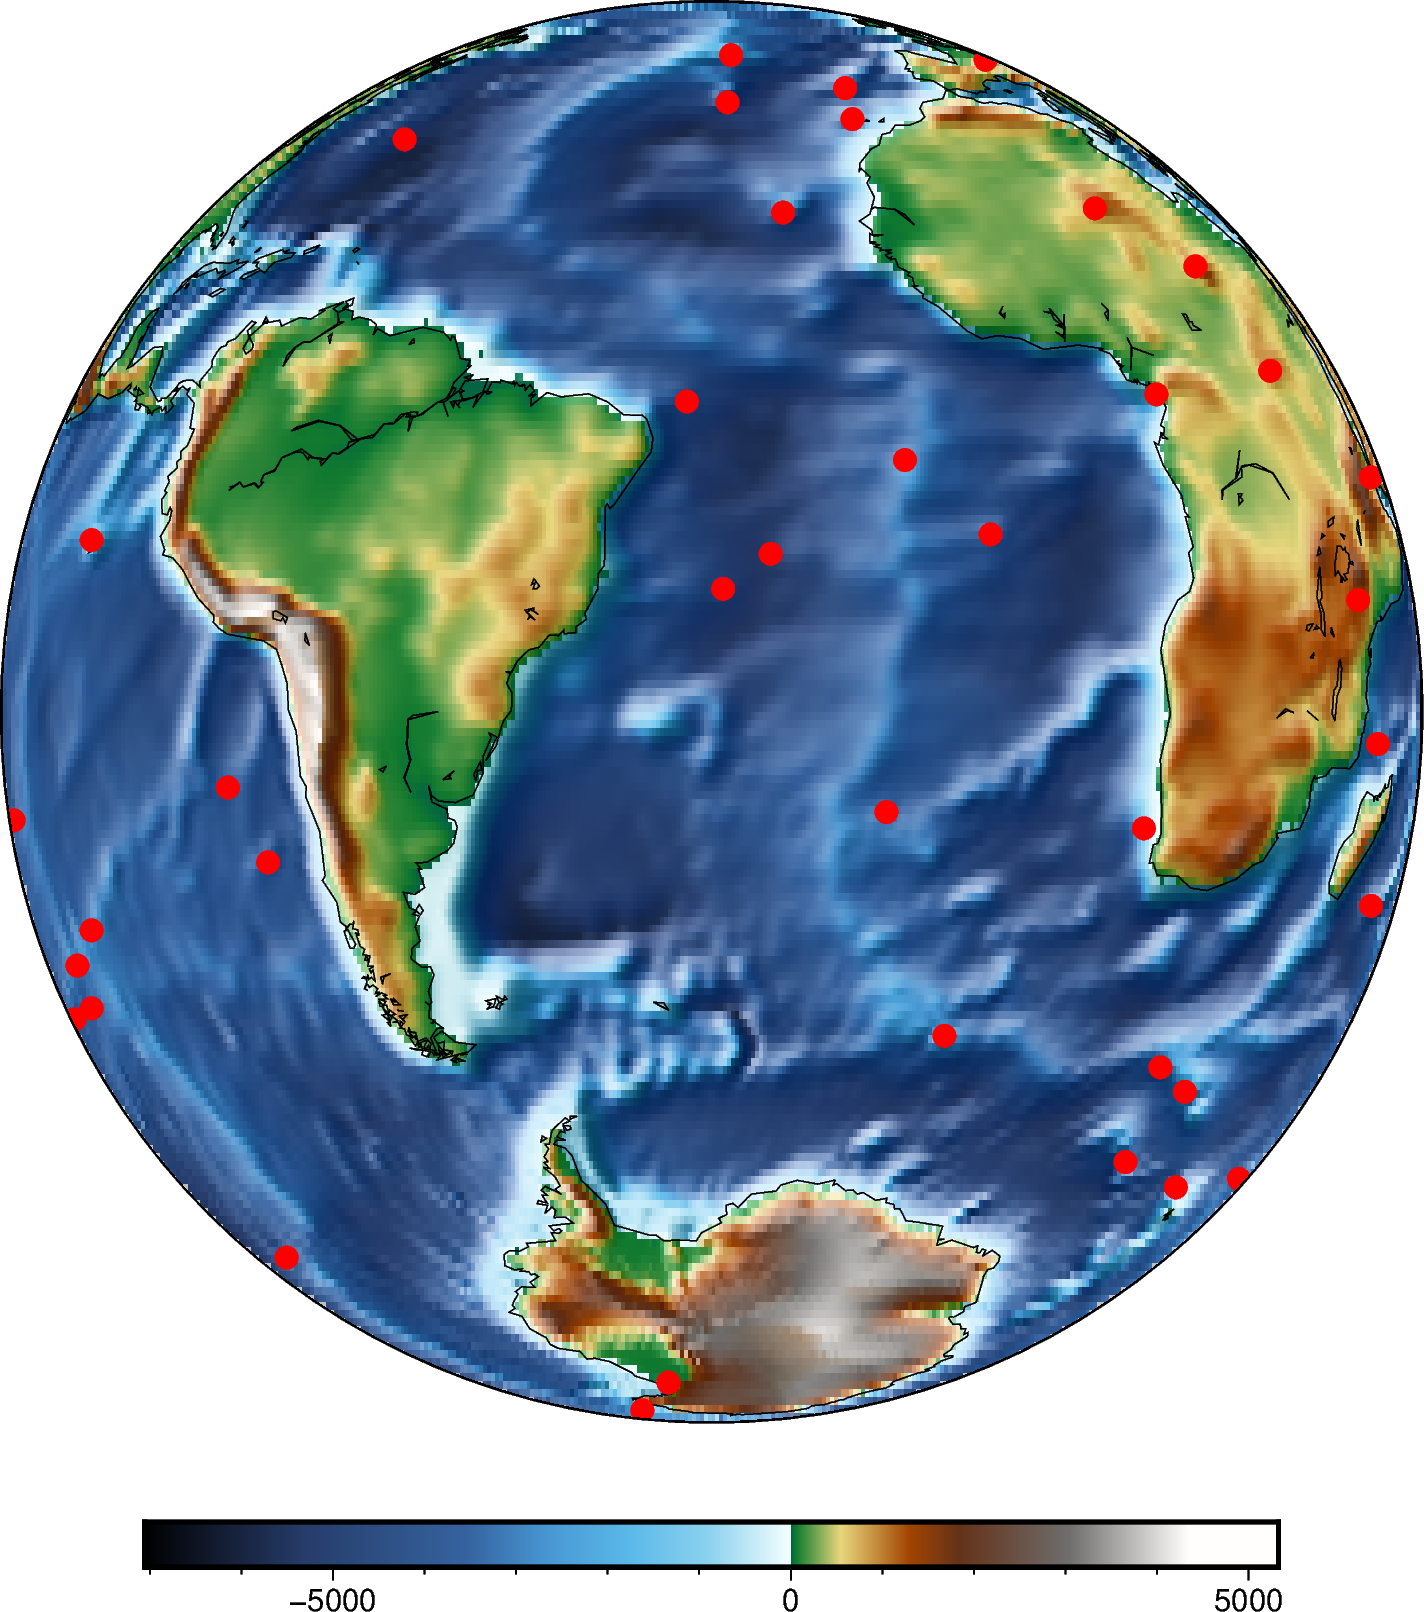

In [5]:
# Just an example
from pygmt.datasets import load_earth_relief #<-- Use global relief for topography

grid = load_earth_relief(resolution='01d', registration='pixel')

fig = pygmt.Figure()
fig.basemap(region='g', projection='G330/-30/12c', frame=True)
fig.grdimage(grid, cmap='geo', shading=True)
fig.coast(resolution='c', shorelines=True, area_thresh=1000)
fig.plot(data='@hotspots.txt', style='c0.2c', fill='red')
fig.colorbar()
fig.show()

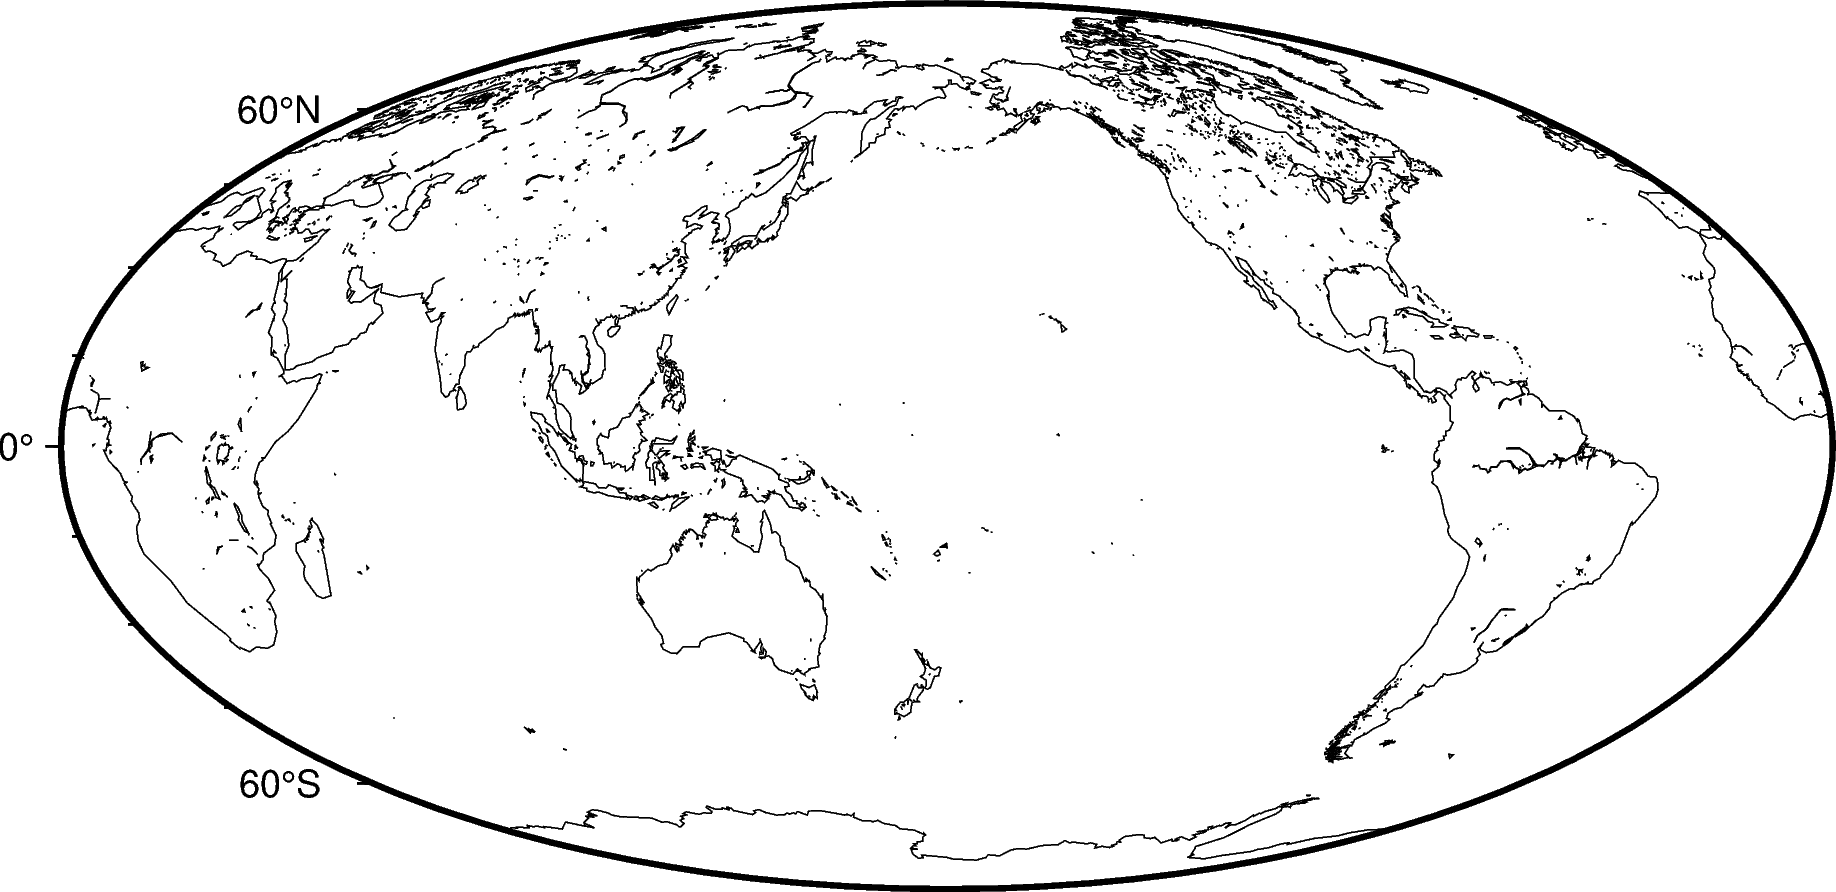

In [6]:
fig = pygmt.Figure()
fig.basemap(region="g", projection="W15c", frame=True)
fig.coast(shorelines=True)
fig.show()

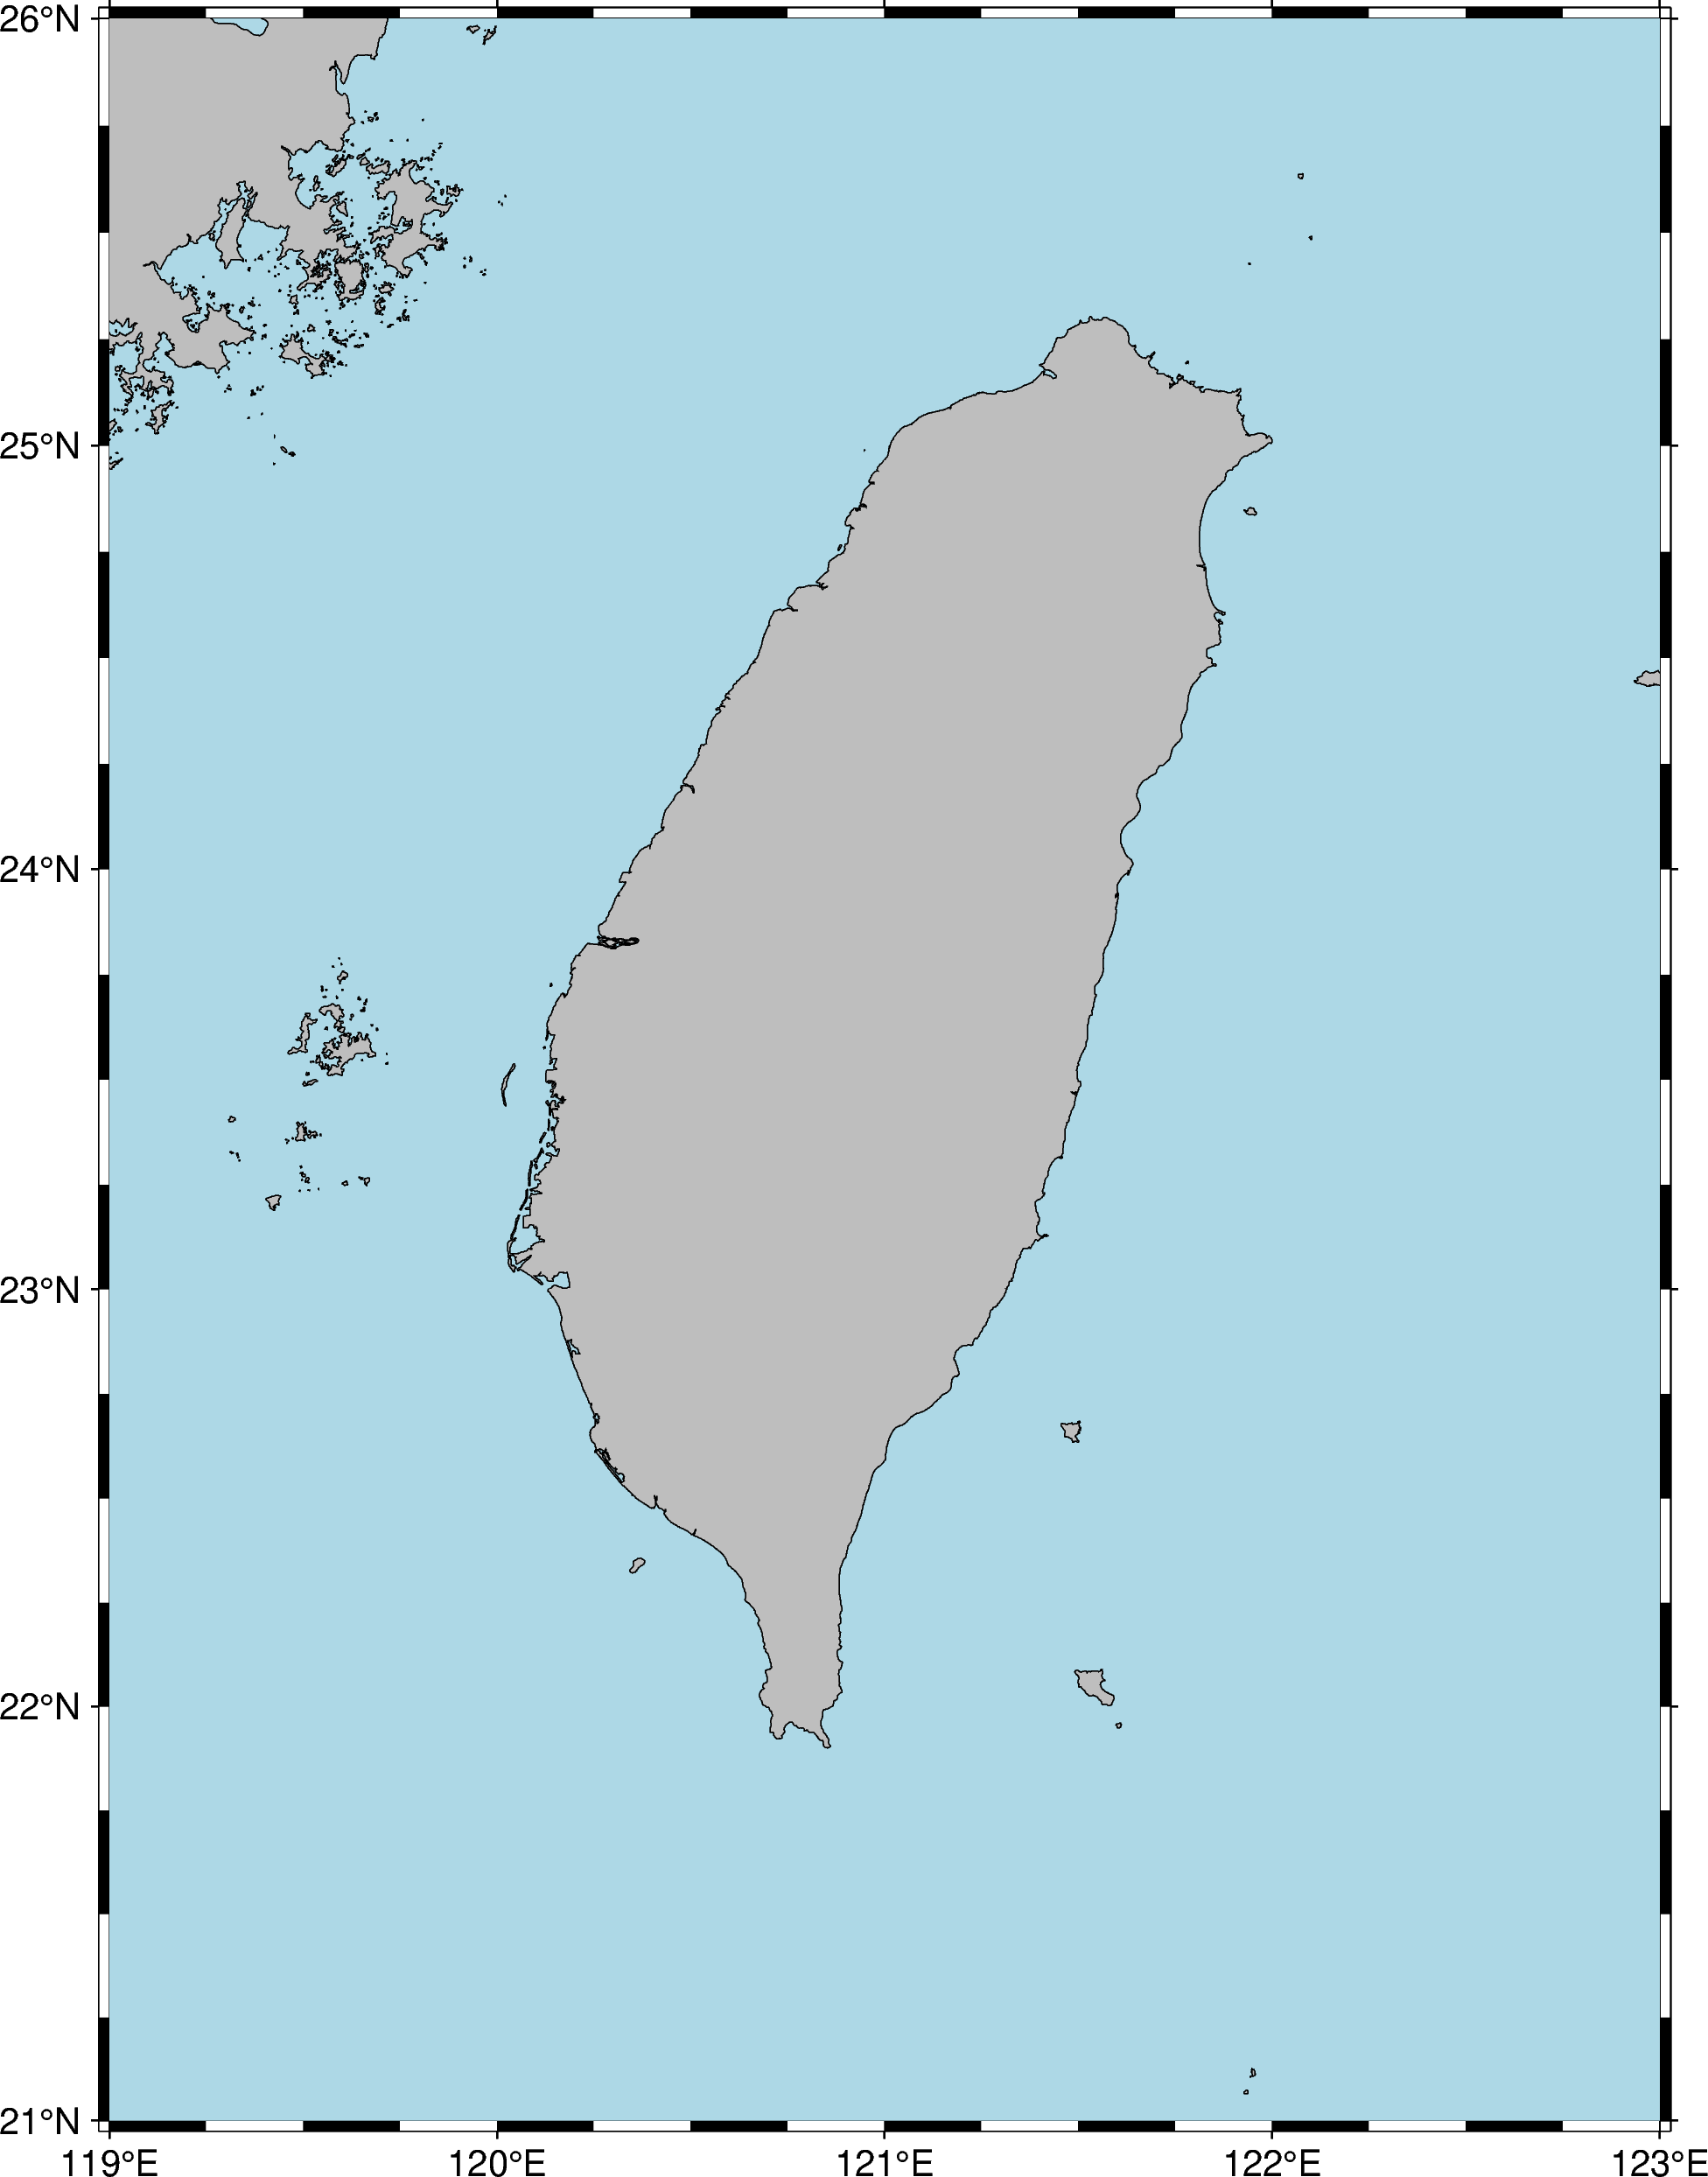

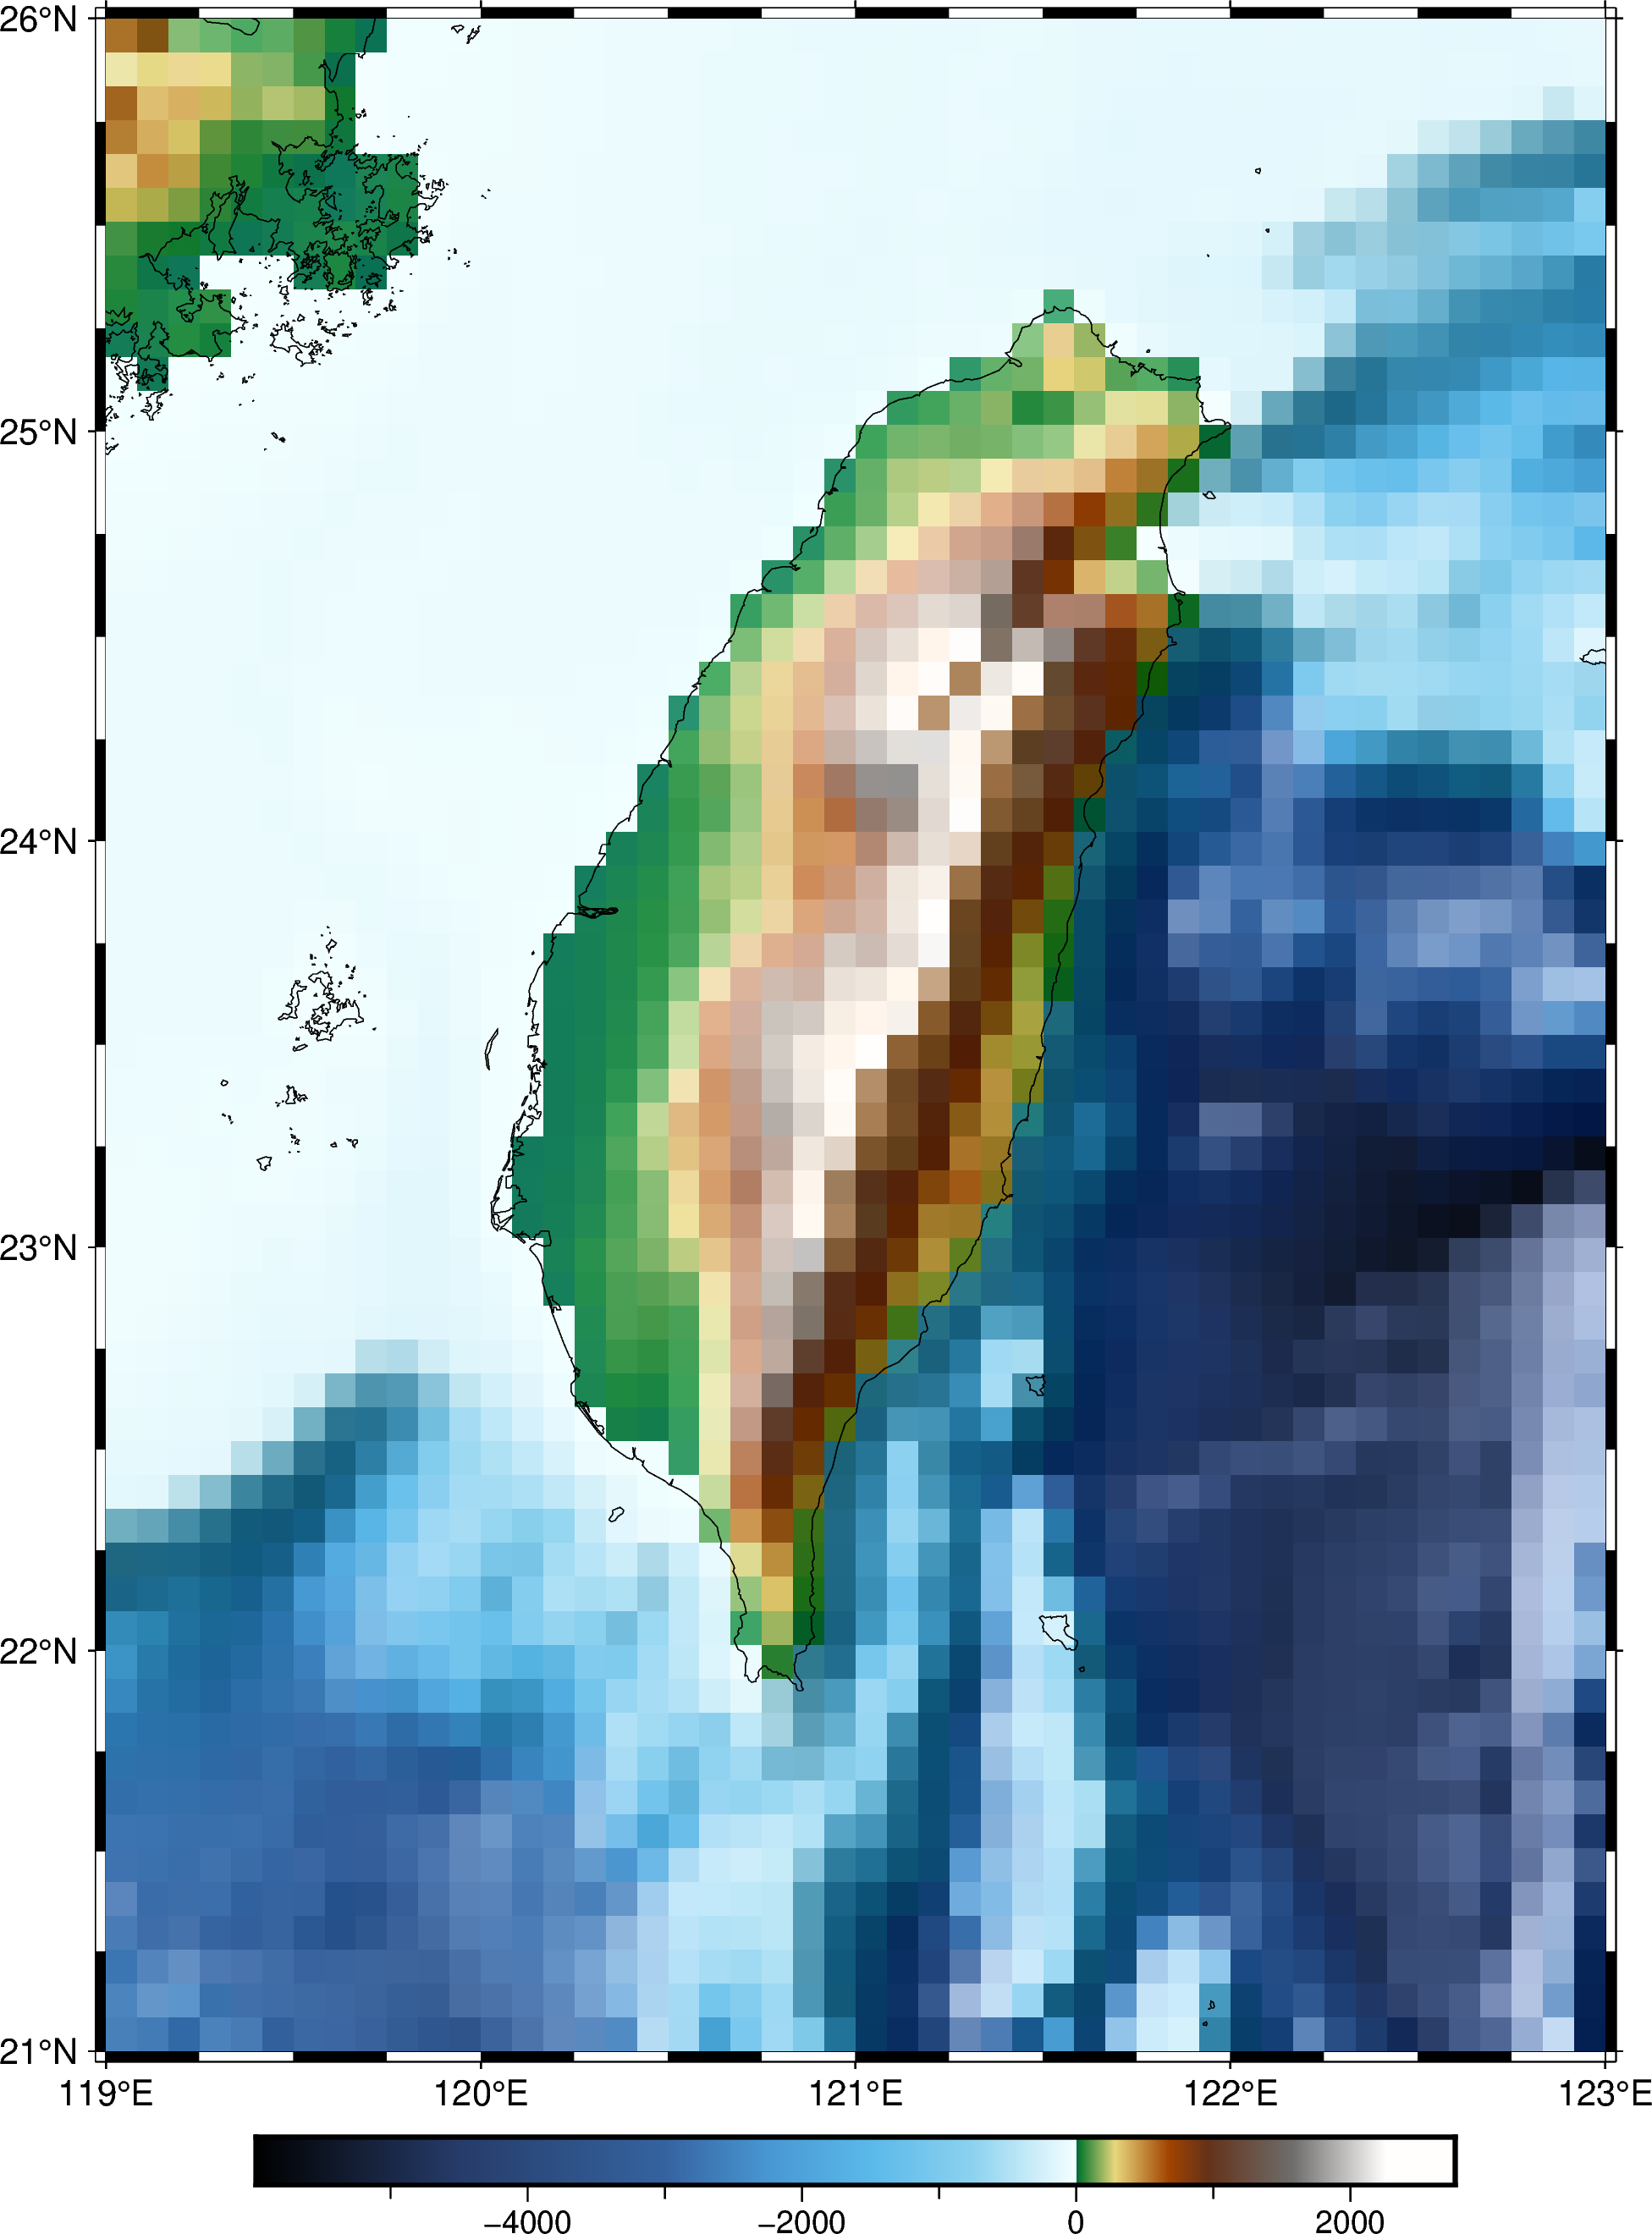

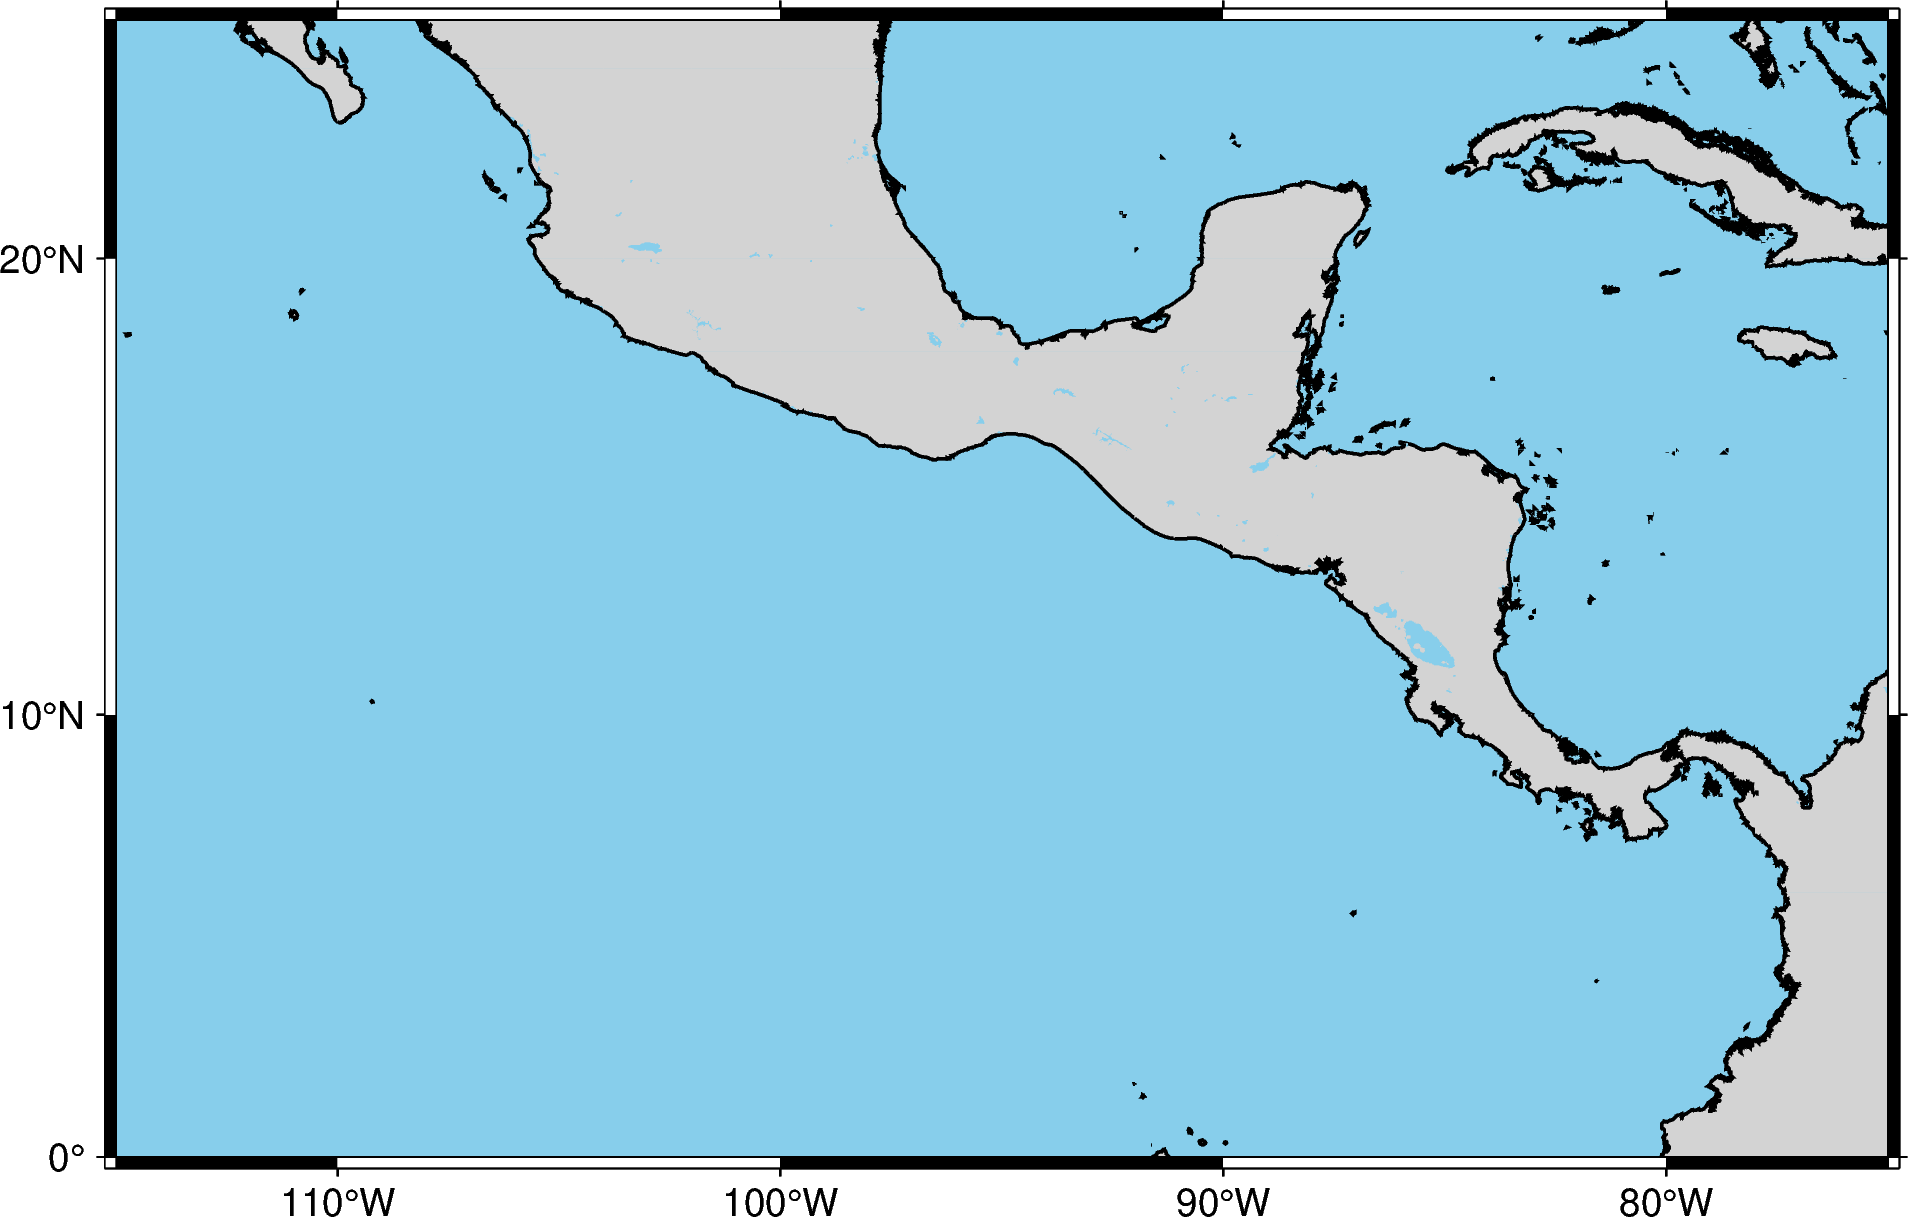

In [22]:
import pygmt
import pandas as pd # 雖然暫時還沒用到 pandas，但保留

# 1. 設定圖的範圍 (Cocos Plate 及其周邊)
region = [-115, -75, 0, 25]

# 2. 建立繪圖物件
fig = pygmt.Figure()

# 3. 載入並繪製地形/水深 (使用 30m 解析度，並修正 CPT 名稱)
fig.grdimage(
    grid="@earth_relief_30m",  # 使用 30 分鐘解析度
    region=region,
    projection="M15c",
    cmap="topo",               # 直接使用內建名稱
    shading=True,
)

# 4. 繪製海岸線和陸地/水域邊界
fig.coast(
    resolution="h",
    shorelines="1/thin",
    frame="a",
    water="skyblue",
    land="lightgray",
)

# 5. 顯示圖形 (在 Google Colab 或 Jupyter 環境中直接顯示)
fig.show(method="notebook")

plot [WARNING]: Cannot use auto-legend -l for variable symbol size unless +S<size> is used. Option -l ignored.
plot [WARNING]: Cannot use auto-legend -l for variable symbol size unless +S<size> is used. Option -l ignored.


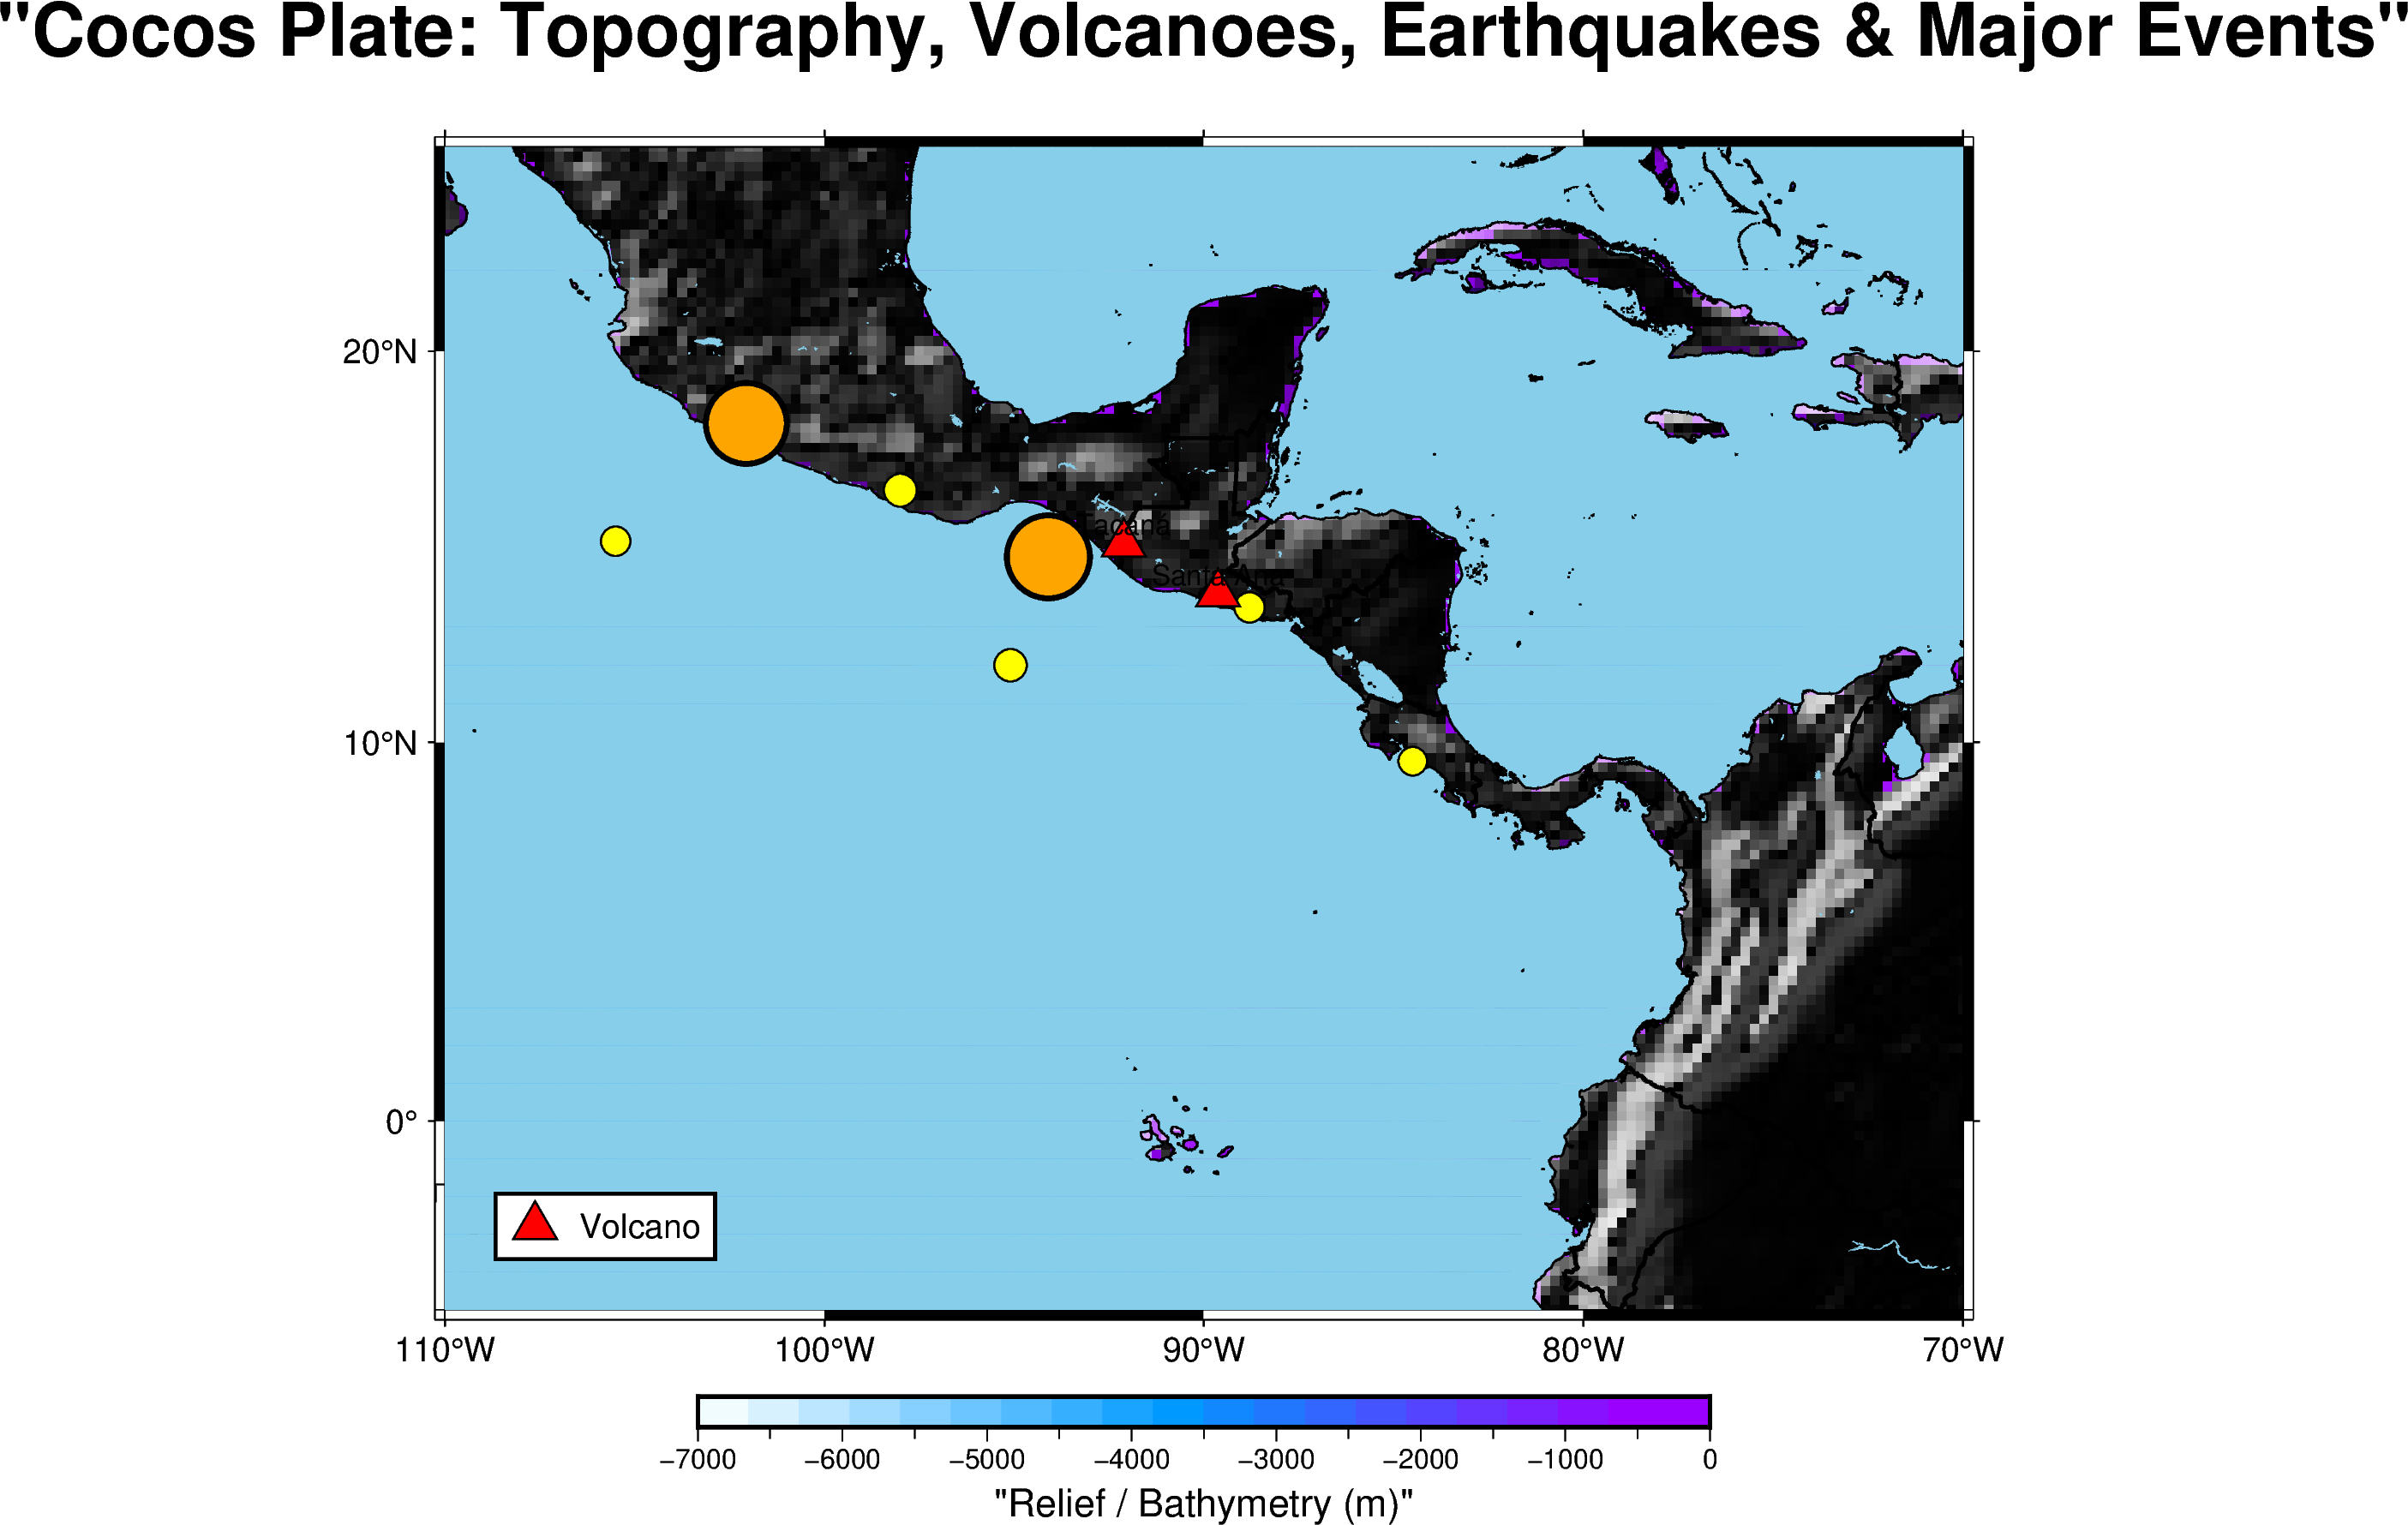

In [36]:
import pygmt
import numpy as np

# ----------------------------------------------------
# 1. 定義繪圖參數 (Define Plot Parameters)
# ----------------------------------------------------

# 定義科科斯板塊的核心區域 (經度/緯度)
# 範圍: 經度 -110 到 -70；緯度 -5 到 25
region = [-110, -70, -5, 25]

# 定義底圖投影 (Mercator 投影，寬度 15cm)
projection = "M15c"

# ----------------------------------------------------
# 2. 準備地震和火山數據 (Real Data for Cocos Plate)
# ----------------------------------------------------
# 實際使用時，建議從 USGS 下載更多點數據

# 近期/一般地震 (範例數據 - 請替換為您的真實 M5.5-M7.0 數據集)
# 格式: 經度, 緯度, 震級 (Magnitude)
all_eqs = {
    'lon': [-105.5, -95.1, -88.8, -98.0, -84.5],
    'lat': [15.2, 12.0, 13.5, 16.5, 9.5],
    'mag': [5.8, 6.4, 6.0, 6.5, 5.7]
}

# 著名歷史地震 (Major Earthquakes)
major_eqs = {
    'lon': [-102.06, -94.10], # 1985 Mexico City, 2017 Chiapas
    'lat': [18.19, 14.80],
    'mag': [8.0, 8.2]
}

# 火山數據 (Volcanoes)
volcanoes = {
    'lon': [-92.11, -89.63], # Tacaná, Santa Ana
    'lat': [15.13, 13.85],
    'name': ['Tacaná', 'Santa Ana']
}

# ----------------------------------------------------
# 3. 繪製圖形 (Start Plotting)
# ----------------------------------------------------

fig = pygmt.Figure()

# 獲取地形/水深數據 (15 弧分解析度)
grid = pygmt.datasets.load_earth_relief(
    resolution='15m',
    region=region
)

# 設置顏色表 (CPT)
pygmt.makecpt(
    cmap='globe',
    series=[-7000, 0],
    output='relief.cpt',
    reverse=True
)

# A. 繪製地形和水深 (Relief and Bathymetry)
fig.grdimage(
    grid=grid,
    region=region,
    projection=projection,
    shading=True,
    cmap='relief.cpt'
)

# B. 繪製海岸線和邊界
fig.basemap(
    # 修正: frame 參數中添加了網格 'a'
    frame=['a', '+t"Cocos Plate: Topography, Volcanoes, Earthquakes & Major Events"'],
    # 修正: 移除不受支持的 +h 修飾符
    map_scale='n0.05/0.1+w500k+l'
)

fig.coast(
    resolution='f',
    borders=['1/1p,black'],
    water='skyblue',
    shorelines='1/0.5p,black'
)

# C. 繪製一般地震 (Earthquakes)
fig.plot(  # <-- 修正: 使用 fig.plot
    x=all_eqs['lon'],
    y=all_eqs['lat'],
    size=[s * 0.05 for s in all_eqs['mag']],
    style='c',  # Circle
    fill='yellow', # <-- 修正: 將 color 改為 fill
    pen='0.5p,black',
    label='Earthquake'
)

# D. 繪製著名歷史地震 (Major Earthquakes)
fig.plot(  # <-- 修正: 使用 fig.plot
    x=major_eqs['lon'],
    y=major_eqs['lat'],
    size=[s * 0.1 for s in major_eqs['mag']],
    style='c',
    fill='orange', # <-- 修正: 將 color 改為 fill
    pen='1.5p,black',
    label='Major Earthquake'
)

# E. 繪製火山 (Volcanoes)
fig.plot(  # <-- 修正: 使用 fig.plot
    x=volcanoes['lon'],
    y=volcanoes['lat'],
    style='t0.5c',  # 0.3cm 三角形
    fill='red', # <-- 修正: 將 color 改為 fill
    pen='0.5p,black',
    label='Volcano'
)

# 為了類似您的範例圖，我們可以標註火山名稱
fig.text(
    x=volcanoes['lon'],
    y=np.array(volcanoes['lat']) + 0.5, # 稍微偏移，避免覆蓋符號
    text=volcanoes['name'],
    font='8p,black'
)


# F. 添加圖例 (Legend)
fig.legend(
    position='JBL+jBL+o0.5c/0.5c',
    box='+gwhite+p1p',
)

# G. 繪製顏色條 (Colorbar)
fig.colorbar(
    # 調整刻度間隔以匹配範例圖的風格
    frame=['a1000f500', 'x+l"Relief / Bathymetry (m)"'],
    cmap='relief.cpt',
    position='JBC+w10c/0.3c+h',
    truncate='-7000/0'
)

# H. 顯示和保存圖形
fig.show()
# fig.savefig("Cocos_Plate_Map.png")

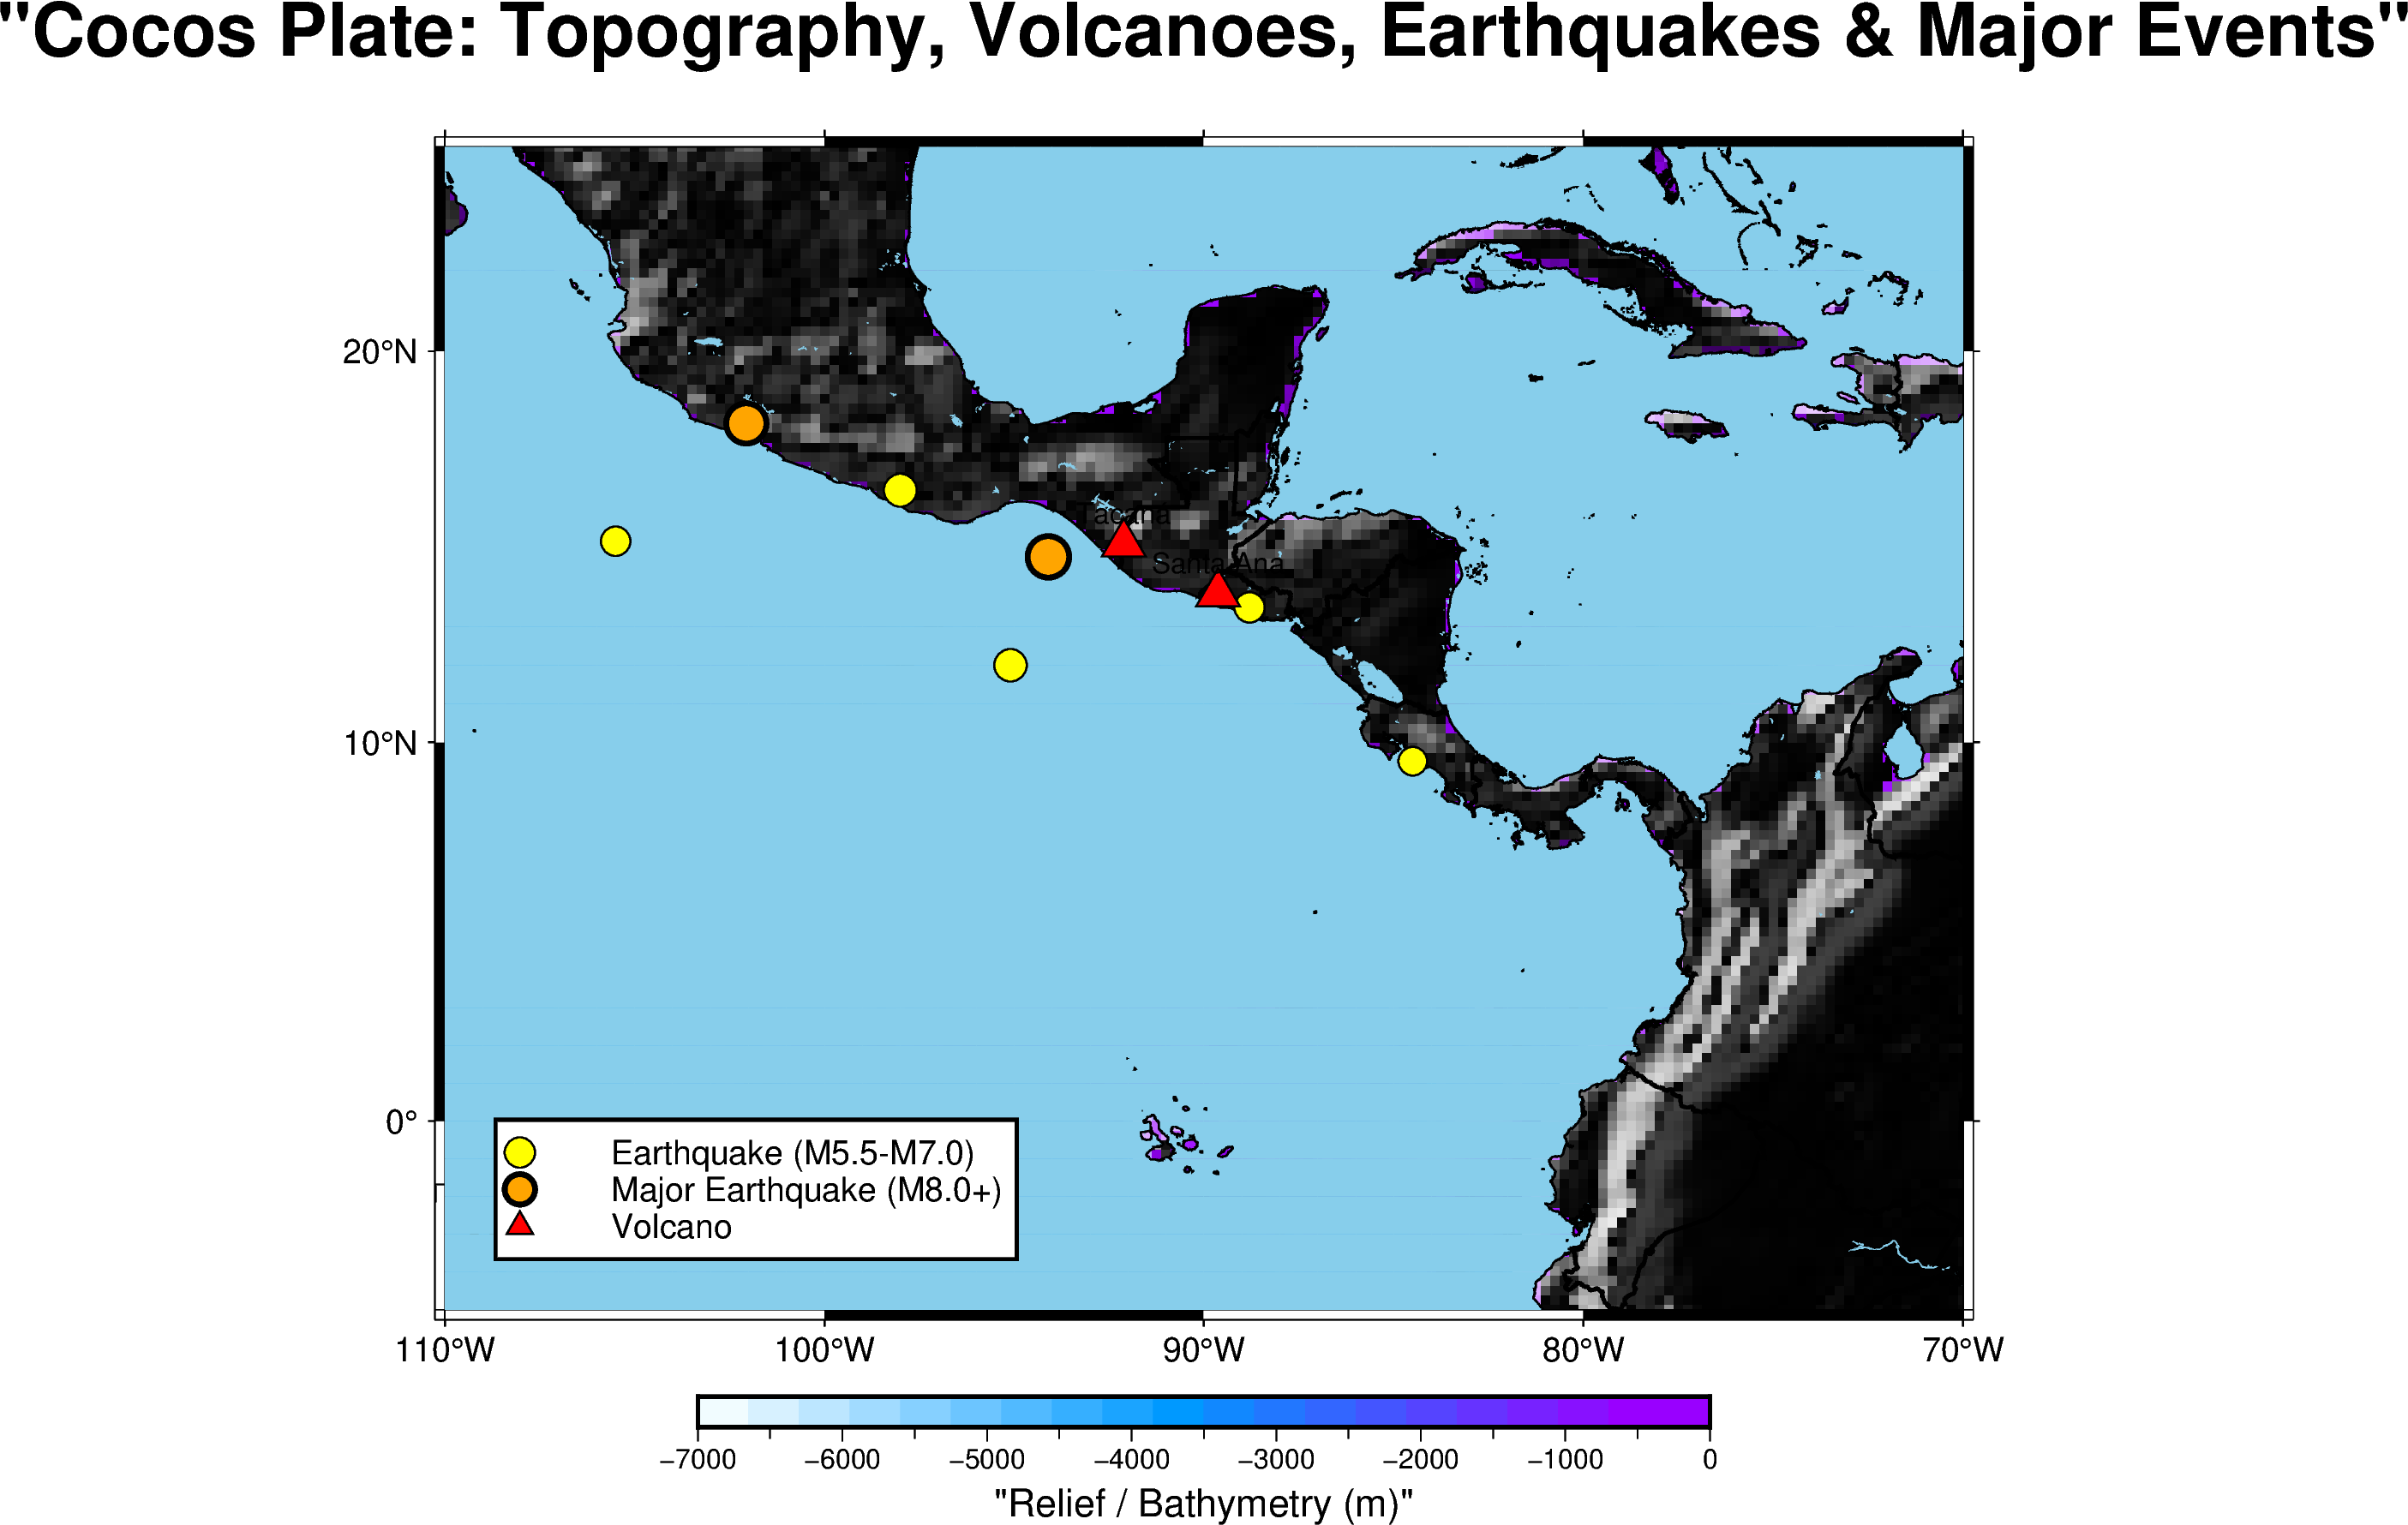

In [49]:
import pygmt
import numpy as np
import tempfile
import os

# ----------------------------------------------------
# 1. 定義繪圖參數
# ----------------------------------------------------
region = [-110, -70, -5, 25]
projection = "M15c"

# ----------------------------------------------------
# 2. 準備地震和火山數據
# ----------------------------------------------------
# 近期/一般地震
all_eqs = {
    'lon': [-105.5, -95.1, -88.8, -98.0, -84.5],
    'lat': [15.2, 12.0, 13.5, 16.5, 9.5],
    'mag': [5.8, 6.4, 6.0, 6.5, 5.7]
}

# 著名歷史地震 (Major Earthquakes)
major_eqs = {
    'lon': [-102.06, -94.10],
    'lat': [18.19, 14.80],
    'mag': [8.0, 8.2]
}

# 火山數據 (Volcanoes)
volcanoes = {
    'lon': [-92.11, -89.63],
    'lat': [15.13, 13.85],
    'name': ['Tacaná', 'Santa Ana']
}

# ----------------------------------------------------
# 3. 繪製圖形
# ----------------------------------------------------

fig = pygmt.Figure()

grid = pygmt.datasets.load_earth_relief(resolution='15m', region=region)
pygmt.makecpt(cmap='globe', series=[-7000, 0], output='relief.cpt', reverse=True)

# A. 繪製地形和水深
fig.grdimage(
    grid=grid,
    region=region,
    projection=projection,
    shading=True,
    cmap='relief.cpt'
)

# B. 繪製海岸線和邊界
fig.basemap(
    frame=['a', '+t"Cocos Plate: Topography, Volcanoes, Earthquakes & Major Events"'],
    map_scale='n0.05/0.1+w500k+l'
)

fig.coast(
    resolution='f',
    borders=['1/1p,black'],
    water='skyblue',
    shorelines='1/0.5p,black'
)

# C. 繪製一般地震
fig.plot(
    x=all_eqs['lon'],
    y=all_eqs['lat'],
    size=[s * 0.05 for s in all_eqs['mag']],
    style='c',
    fill='yellow',
    pen='0.5p,black',
)

# D. 繪製著名歷史地震
fig.plot(
    x=major_eqs['lon'],
    y=major_eqs['lat'],
    size=[s * 0.05 for s in major_eqs['mag']],
    style='c',
    fill='orange',
    pen='1.5p,black',
)

# E. 繪製火山
fig.plot(
    x=volcanoes['lon'],
    y=volcanoes['lat'],
    style='t0.5c',
    fill='red',
    pen='0.5p,black',
)

# 標註火山名稱
fig.text(
    x=volcanoes['lon'],
    y=np.array(volcanoes['lat']) + 0.8,
    text=volcanoes['name'],
    font='8p,black'
)


# F. 添加圖例 (Legend) - ***圖例文字改為英文***
# 1. 圖例內容定義為 Python 列表
legend_content = [
    # 修正: 將中文替換為英文標籤
    "S 0.1c c 0.3c yellow 0.5p,black 1c Earthquake (M5.5-M7.0)",
    "S 0.1c c 0.3c orange 1.5p,black 1c Major Earthquake (M8.0+)",
    "S 0.1c t 0.3c red 0.5p,black 1c Volcano",
]

# 2. 創建一個臨時檔案，並將圖例內容寫入
with tempfile.NamedTemporaryFile(mode='w', delete=False, suffix='.gmt', encoding='utf-8') as tmp:
    tmp.write('\n'.join(legend_content) + '\n')
    legend_file = tmp.name

# 3. 調用 fig.legend
fig.legend(
    position='JBL+jBL+o0.5c/0.5c',
    box='+gwhite+p1p',
    spec=legend_file
)

# G. 繪製顏色條 (Colorbar)
fig.colorbar(
    frame=['a1000f500', 'x+l"Relief / Bathymetry (m)"'],
    cmap='relief.cpt',
    position='JBC+w10c/0.3c+h',
    truncate='-7000/0'
)

# H. 顯示和保存圖形，並清理臨時檔案
fig.show()
# 刪除創建的臨時檔案
os.remove(legend_file)
# fig.savefig("Cocos_Plate_Map.png")

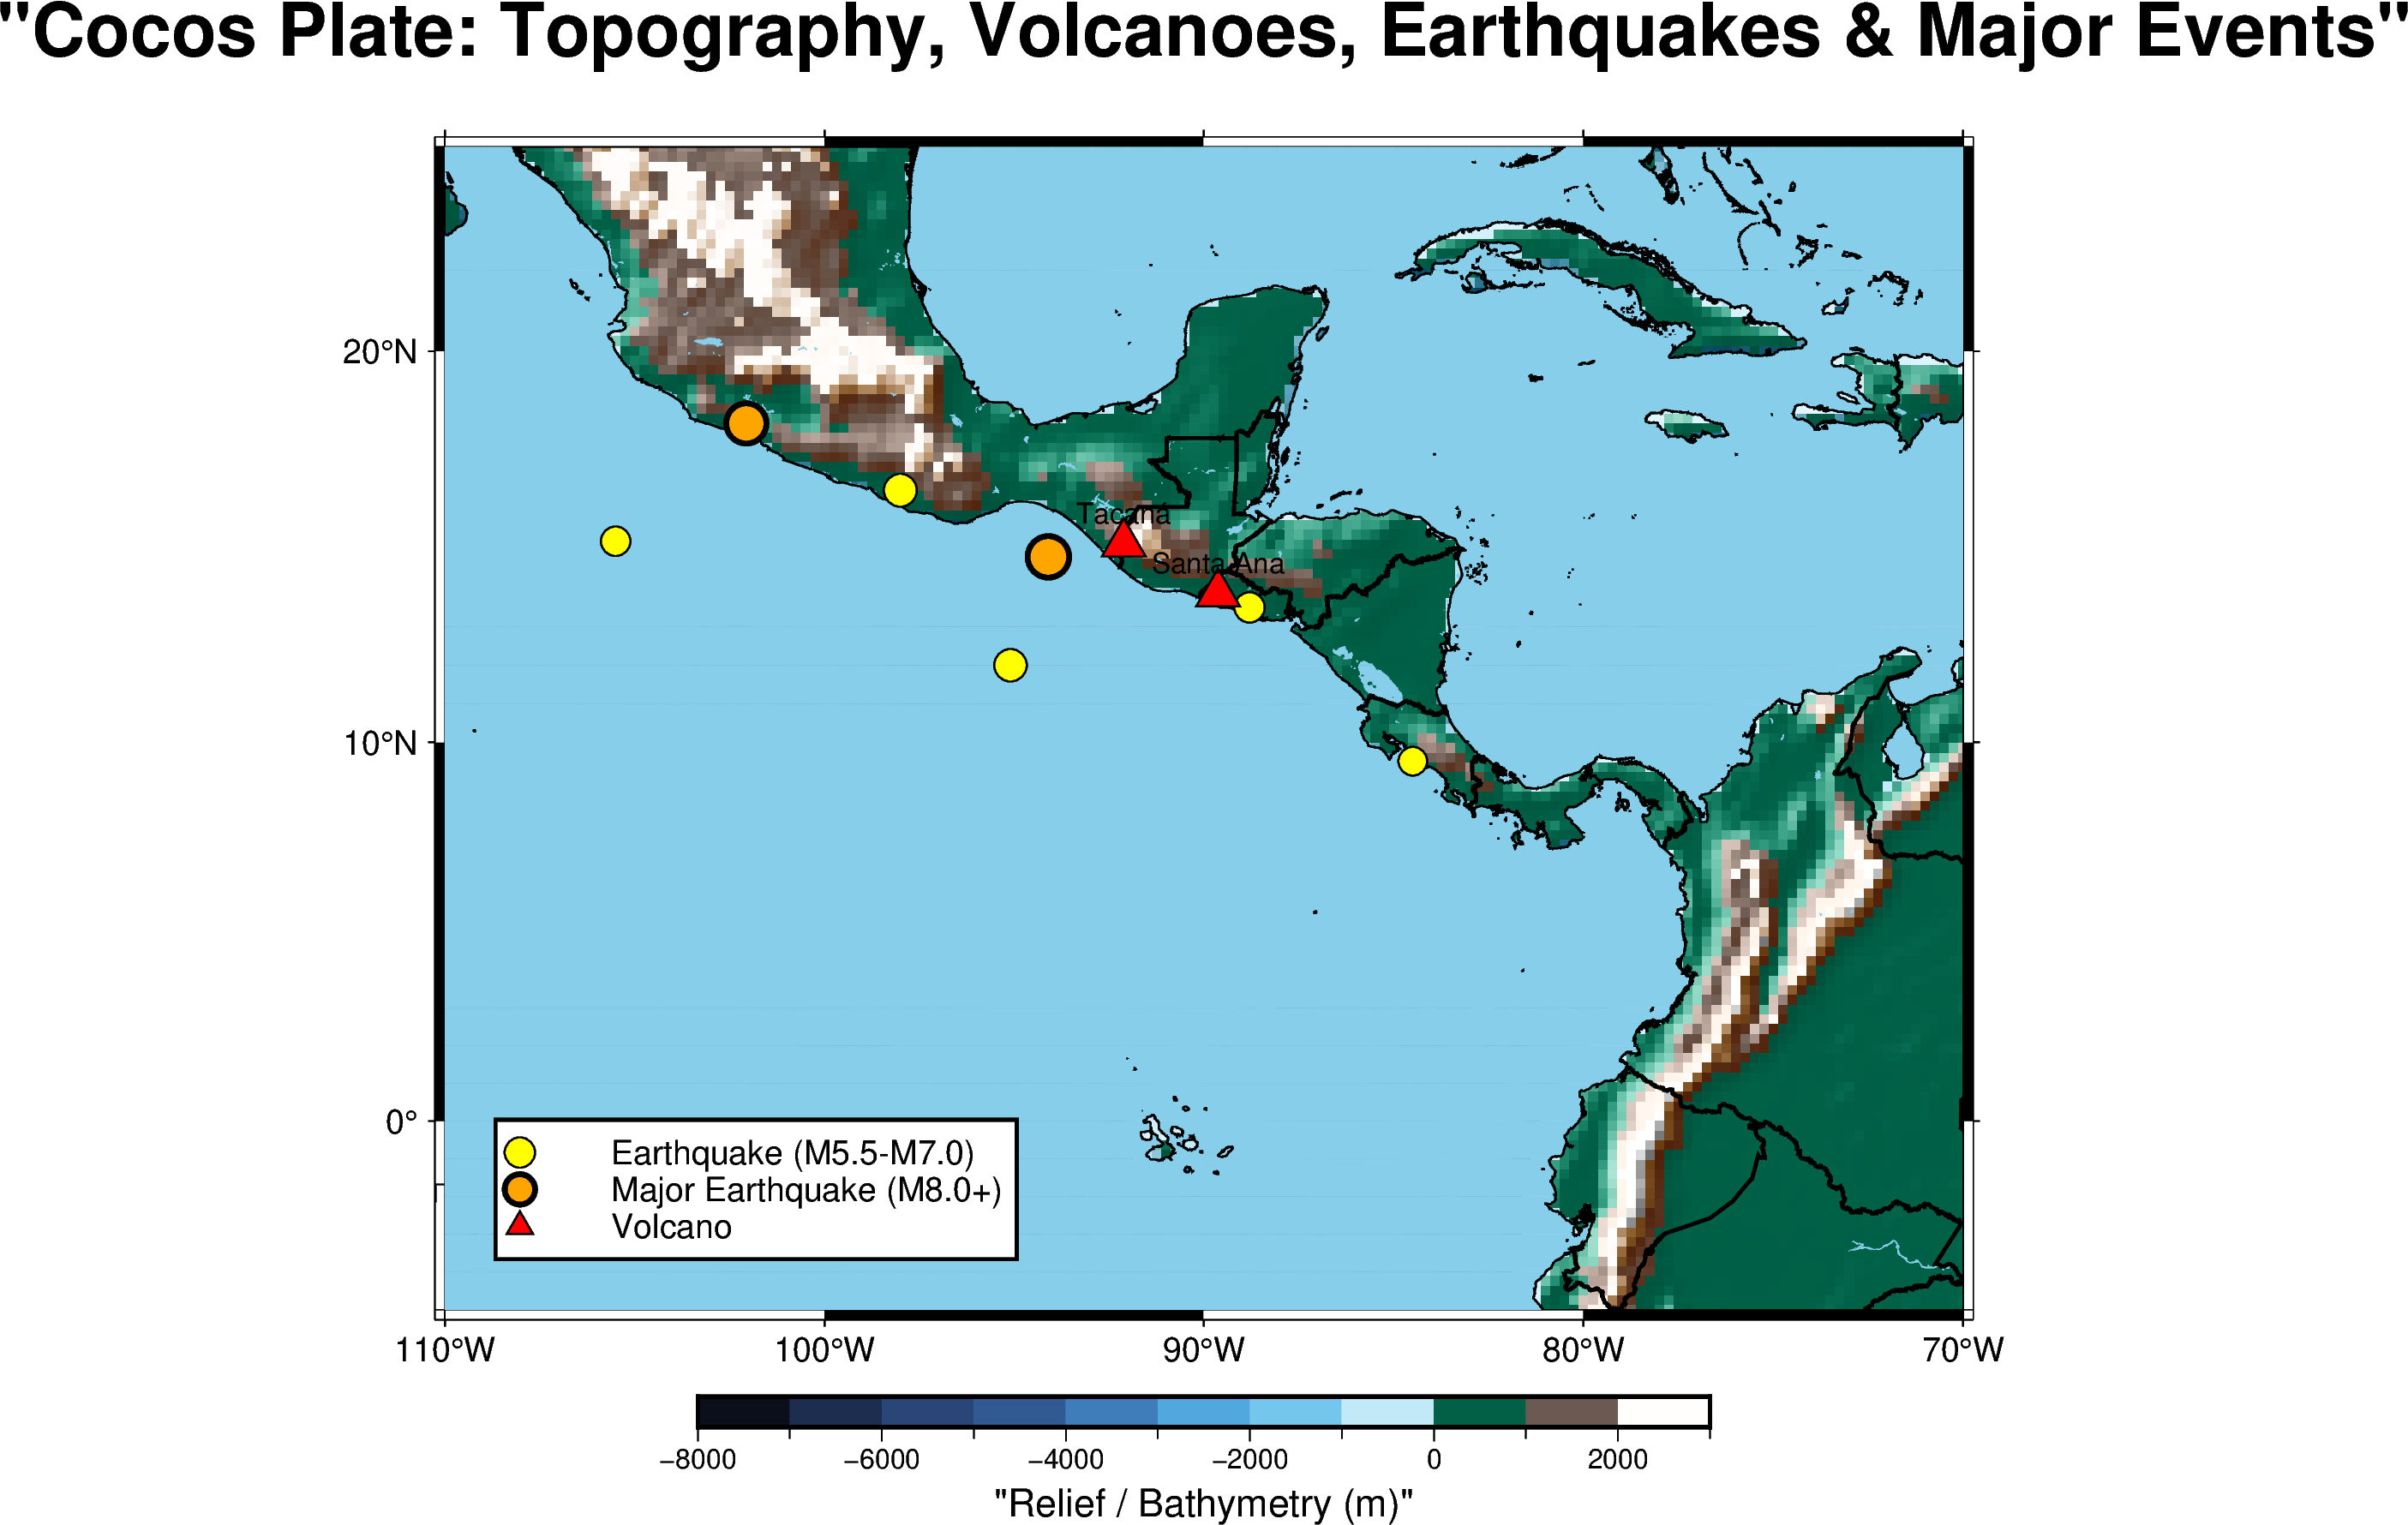

In [50]:
import pygmt
import numpy as np
import tempfile
import os

# ----------------------------------------------------
# 1. 定義繪圖參數
# ----------------------------------------------------
region = [-110, -70, -5, 25]
projection = "M15c"

# ----------------------------------------------------
# 2. 準備地震和火山數據
# ----------------------------------------------------
# 近期/一般地震
all_eqs = {
    'lon': [-105.5, -95.1, -88.8, -98.0, -84.5],
    'lat': [15.2, 12.0, 13.5, 16.5, 9.5],
    'mag': [5.8, 6.4, 6.0, 6.5, 5.7]
}

# 著名歷史地震 (Major Earthquakes)
major_eqs = {
    'lon': [-102.06, -94.10],
    'lat': [18.19, 14.80],
    'mag': [8.0, 8.2]
}

# 火山數據 (Volcanoes)
volcanoes = {
    'lon': [-92.11, -89.63],
    'lat': [15.13, 13.85],
    'name': ['Tacaná', 'Santa Ana']
}

# ----------------------------------------------------
# 3. 繪製圖形
# ----------------------------------------------------

fig = pygmt.Figure()

# 獲取地形/水深數據 (15 弧分解析度)
grid = pygmt.datasets.load_earth_relief(resolution='15m', region=region)

# 設置顏色表 (CPT) - ***修正: 使用 'geo' CPT 並調整範圍***
pygmt.makecpt(
    cmap='geo',
    series=[-8000, 3000, 1000], # 範圍擴大到 -8000m 到 3000m
    output='relief.cpt',
    reverse=False
)

# A. 繪製地形和水深
fig.grdimage(
    grid=grid,
    region=region,
    projection=projection,
    shading=True,
    cmap='relief.cpt'
)

# B. 繪製海岸線和邊界
fig.basemap(
    frame=['a', '+t"Cocos Plate: Topography, Volcanoes, Earthquakes & Major Events"'],
    map_scale='n0.05/0.1+w500k+l'
)

fig.coast(
    resolution='f',
    borders=['1/1p,black'],
    water='skyblue',
    shorelines='1/0.5p,black'
)

# C. 繪製一般地震
fig.plot(
    x=all_eqs['lon'],
    y=all_eqs['lat'],
    size=[s * 0.05 for s in all_eqs['mag']],
    style='c',
    fill='yellow',
    pen='0.5p,black',
)

# D. 繪製著名歷史地震
fig.plot(
    x=major_eqs['lon'],
    y=major_eqs['lat'],
    size=[s * 0.05 for s in major_eqs['mag']],
    style='c',
    fill='orange',
    pen='1.5p,black',
)

# E. 繪製火山
fig.plot(
    x=volcanoes['lon'],
    y=volcanoes['lat'],
    style='t0.5c',
    fill='red',
    pen='0.5p,black',
)

# 標註火山名稱
fig.text(
    x=volcanoes['lon'],
    y=np.array(volcanoes['lat']) + 0.8,
    text=volcanoes['name'],
    font='8p,black'
)


# F. 添加圖例 (Legend)
# 1. 圖例內容定義為 Python 列表
legend_content = [
    "S 0.1c c 0.3c yellow 0.5p,black 1c Earthquake (M5.5-M7.0)",
    "S 0.1c c 0.3c orange 1.5p,black 1c Major Earthquake (M8.0+)",
    "S 0.1c t 0.3c red 0.5p,black 1c Volcano",
]

# 2. 創建一個臨時檔案，並將圖例內容寫入
with tempfile.NamedTemporaryFile(mode='w', delete=False, suffix='.gmt', encoding='utf-8') as tmp:
    tmp.write('\n'.join(legend_content) + '\n')
    legend_file = tmp.name

# 3. 調用 fig.legend
fig.legend(
    position='JBL+jBL+o0.5c/0.5c',
    box='+gwhite+p1p',
    spec=legend_file
)

# G. 繪製顏色條 (Colorbar) - ***修正: 調整 truncate 範圍***
fig.colorbar(
    # 調整刻度以反映更廣的範圍
    frame=['a2000f1000', 'x+l"Relief / Bathymetry (m)"'],
    cmap='relief.cpt',
    position='JBC+w10c/0.3c+h',
    truncate='-8000/3000' # 匹配新的 series 範圍
)

# H. 顯示和保存圖形，並清理臨時檔案
fig.show()
# 刪除創建的臨時檔案
os.remove(legend_file)
# fig.savefig("Cocos_Plate_Map.png")

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.7 at 03x03 arc minutes reduced by Gaussian Cartesian filtering (15.7 km fullwidth) [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 90x90 degree grid tile (earth_relief_03m_g): S90W180


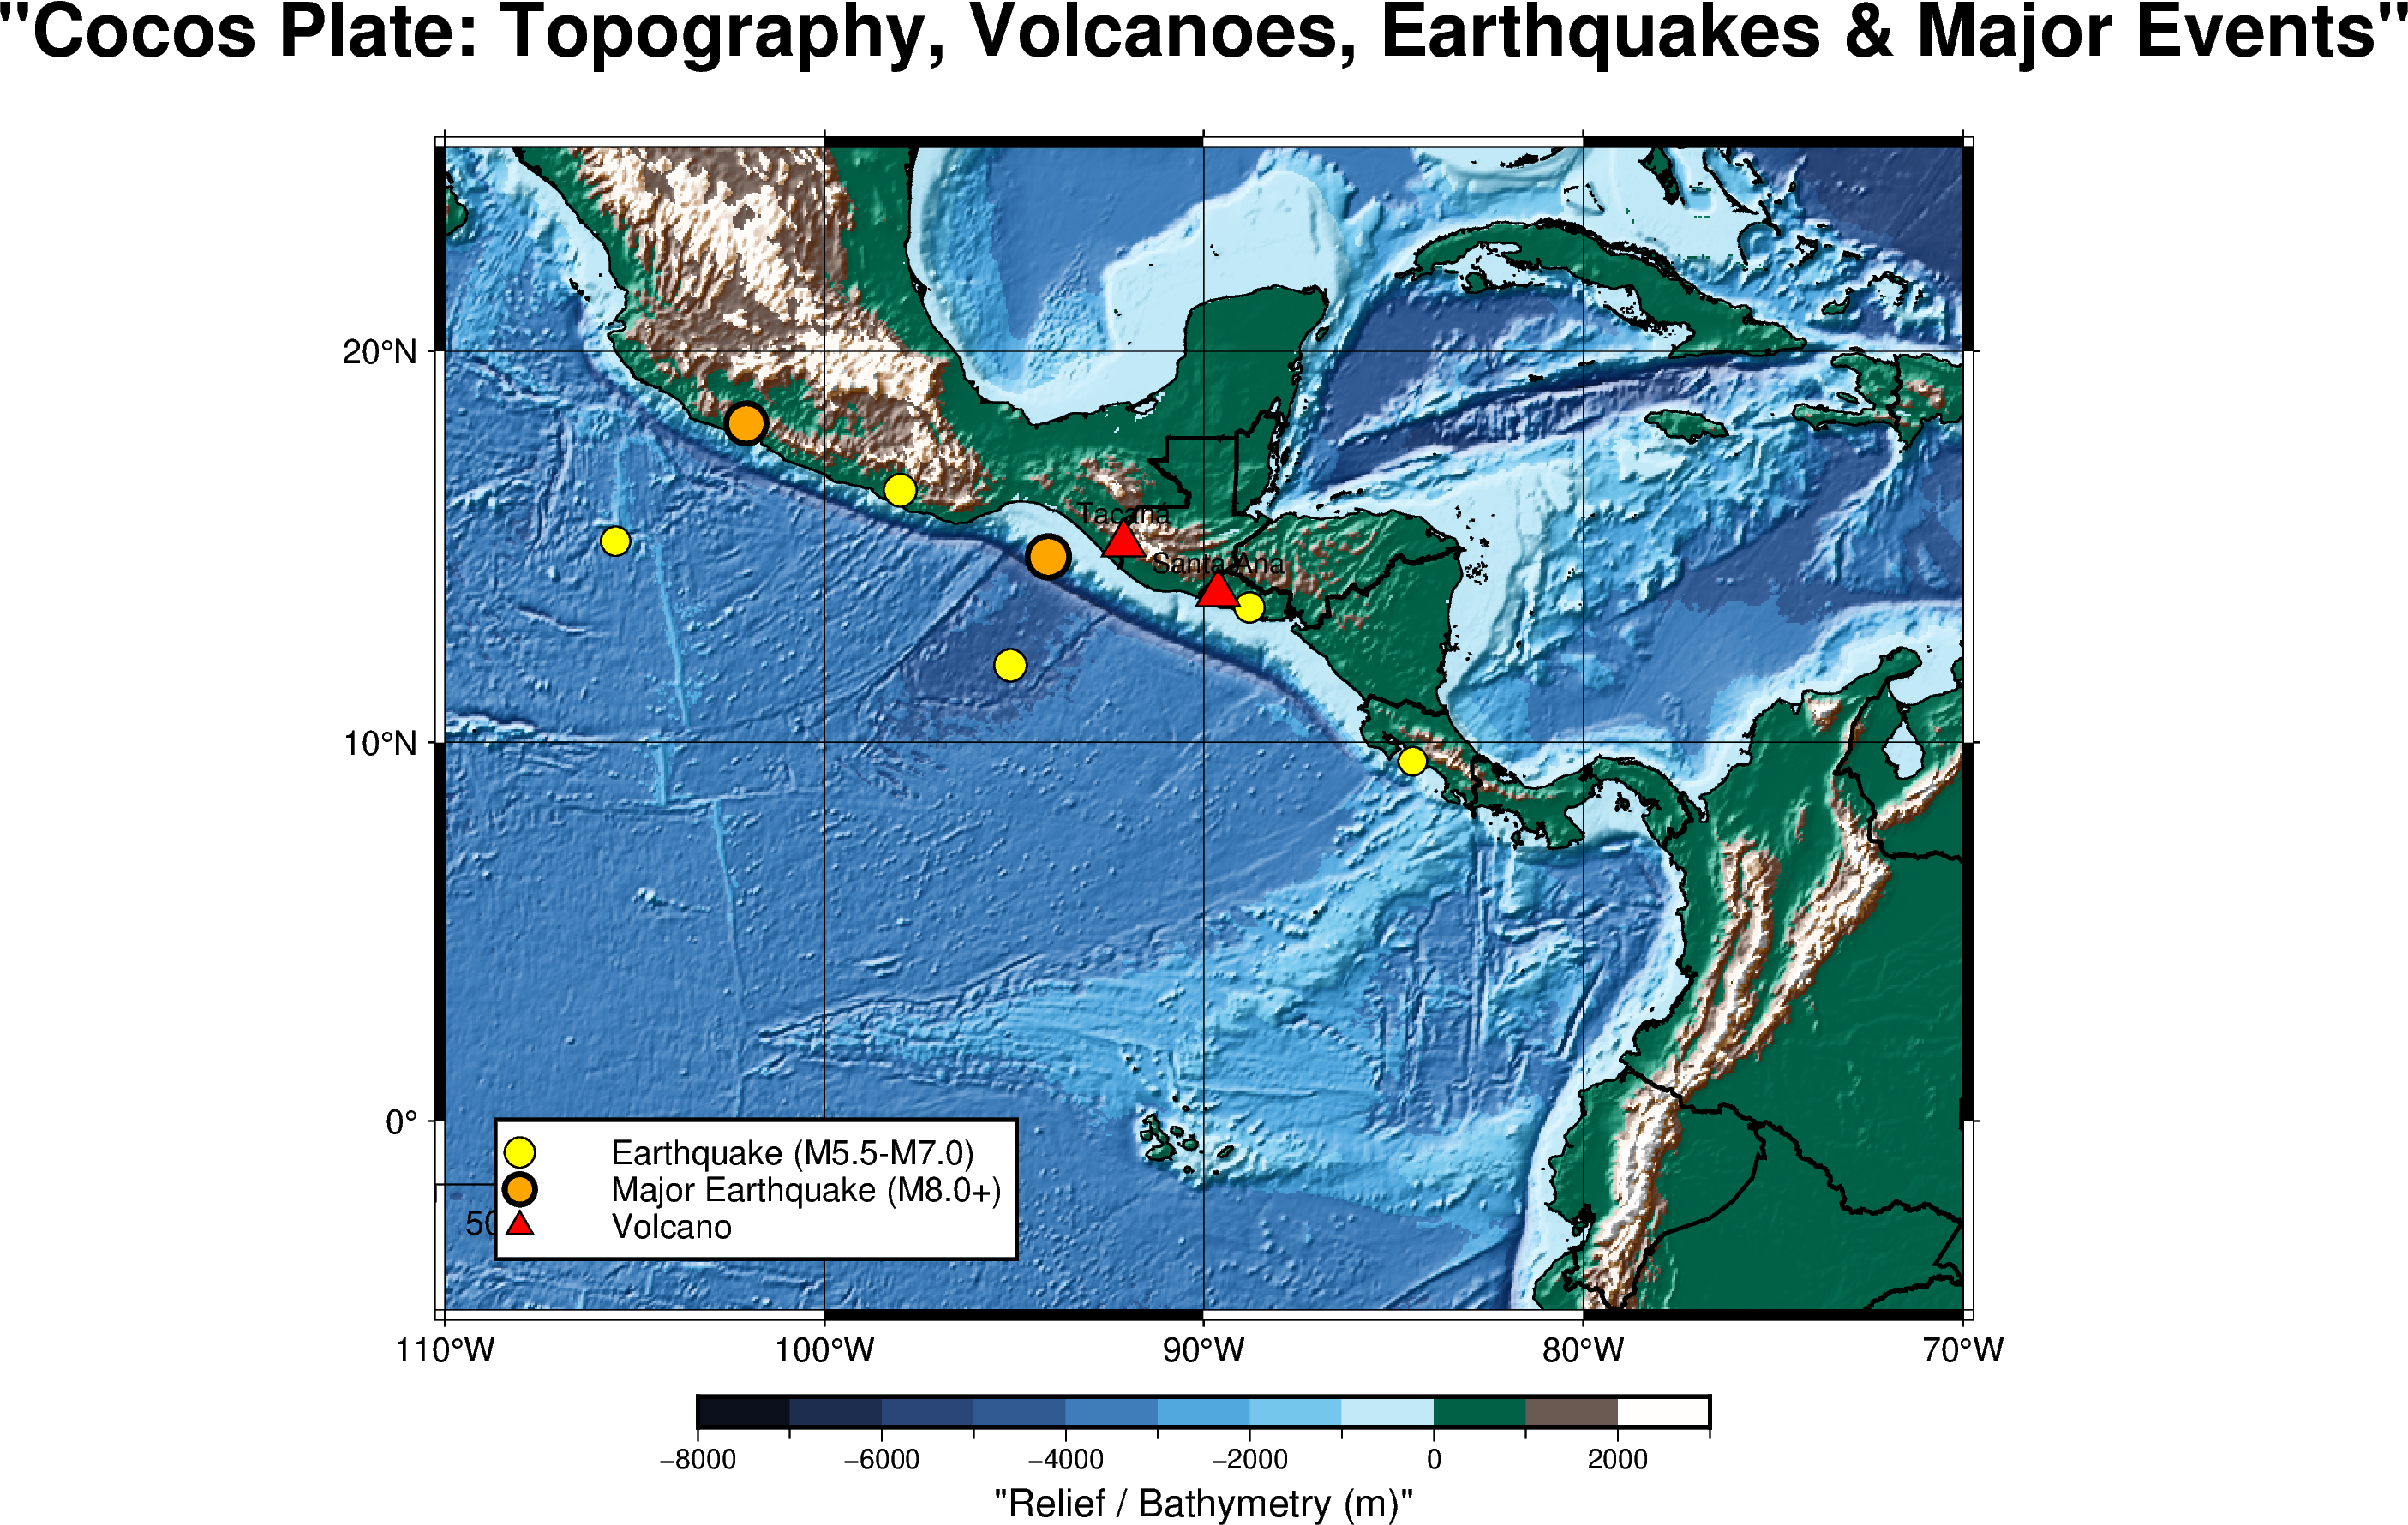

In [52]:
import pygmt
import numpy as np
import tempfile
import os

# ----------------------------------------------------
# 1. 定義繪圖參數
# ----------------------------------------------------
region = [-110, -70, -5, 25]
projection = "M15c"

# ----------------------------------------------------
# 2. 準備地震和火山數據
# ----------------------------------------------------
# ... (數據不變) ...
all_eqs = {
    'lon': [-105.5, -95.1, -88.8, -98.0, -84.5],
    'lat': [15.2, 12.0, 13.5, 16.5, 9.5],
    'mag': [5.8, 6.4, 6.0, 6.5, 5.7]
}
major_eqs = {
    'lon': [-102.06, -94.10],
    'lat': [18.19, 14.80],
    'mag': [8.0, 8.2]
}
volcanoes = {
    'lon': [-92.11, -89.63],
    'lat': [15.13, 13.85],
    'name': ['Tacaná', 'Santa Ana']
}
# ----------------------------------------------------
# 3. 繪製圖形
# ----------------------------------------------------

fig = pygmt.Figure()

# 獲取地形/水深數據 (***修正: 提升解析度到 3 弧分***)
grid = pygmt.datasets.load_earth_relief(
    resolution='03m', # <-- 提升解析度
    region=region
)

# 設置顏色表 (CPT)
pygmt.makecpt(
    cmap='geo',
    series=[-8000, 3000, 1000],
    output='relief.cpt',
    reverse=False
)

# A. 繪製地形和水深
fig.grdimage(
    grid=grid,
    region=region,
    projection=projection,
    shading=True,
    cmap='relief.cpt'
)

# B. 繪製海岸線和邊界
fig.basemap(
    frame=['a', 'g', '+t"Cocos Plate: Topography, Volcanoes, Earthquakes & Major Events"'],
    map_scale='n0.05/0.1+w500k+l'
)

fig.coast(
    resolution='f', # 保持最高解析度
    borders=['1/1p,black'],
    shorelines='1/0.5p,black'
)

# C. 繪製一般地震
fig.plot(
    x=all_eqs['lon'],
    y=all_eqs['lat'],
    size=[s * 0.05 for s in all_eqs['mag']],
    style='c',
    fill='yellow',
    pen='0.5p,black',
)

# D. 繪製著名歷史地震
fig.plot(
    x=major_eqs['lon'],
    y=major_eqs['lat'],
    size=[s * 0.05 for s in major_eqs['mag']],
    style='c',
    fill='orange',
    pen='1.5p,black',
)

# E. 繪製火山
fig.plot(
    x=volcanoes['lon'],
    y=volcanoes['lat'],
    style='t0.5c',
    fill='red',
    pen='0.5p,black',
)

# 標註火山名稱
fig.text(
    x=volcanoes['lon'],
    y=np.array(volcanoes['lat']) + 0.8,
    text=volcanoes['name'],
    font='8p,black'
)


# F. 添加圖例 (Legend)
legend_content = [
    "S 0.1c c 0.3c yellow 0.5p,black 1c Earthquake (M5.5-M7.0)",
    "S 0.1c c 0.3c orange 1.5p,black 1c Major Earthquake (M8.0+)",
    "S 0.1c t 0.3c red 0.5p,black 1c Volcano",
]
with tempfile.NamedTemporaryFile(mode='w', delete=False, suffix='.gmt', encoding='utf-8') as tmp:
    tmp.write('\n'.join(legend_content) + '\n')
    legend_file = tmp.name

fig.legend(
    position='JBL+jBL+o0.5c/0.5c',
    box='+gwhite+p1p',
    spec=legend_file
)

# G. 繪製顏色條 (Colorbar)
fig.colorbar(
    frame=['a2000f1000', 'x+l"Relief / Bathymetry (m)"'],
    cmap='relief.cpt',
    position='JBC+w10c/0.3c+h',
    truncate='-8000/3000'
)

# H. 顯示和保存圖形，並清理臨時檔案
fig.show()
os.remove(legend_file)
# fig.savefig("Cocos_Plate_Map.png", dpi=300) # 建議使用 dpi 參數提高輸出圖像的解析度